Let $y$ be the cat population and $x$ the mice population. The the dynamics of the cat-mice population are described by the Lotka-Volterra equations
$$
\begin{aligned}
\frac{\mathrm{d} x}{\mathrm{~d} t} &=\underbrace{k_{x} x(t)}_{(1)}-\underbrace{k_{y, x} x(t) y(t)}_{(2)}, \\
\frac{\mathrm{d} y}{\mathrm{~d} t} &=-\underbrace{k_{y} y(t)}_{(3)}+\underbrace{k_{x, y} y(t) x(t)}_{(4)}
\end{aligned}
$$
1 and 3 describe the growth/death of the respective populations while 2 and 4 the interactioons between the two populations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from population_dynamics import ExplicitEuler, Integrator, RK2

In [2]:
class LotkaVolterra:
    """This class defines the Lotka--Voltera prey-predator
    system. There are 4 parameters in this class which 
    define the evoluion of the system.

    Attributes:
        k_x     reproduction rate of the mice
        k_yx    death rate of mice when the meet cats
        k_y     death rate of cats
        k_xy     reproduction rate of the cats when they meet cats
    """
    def __init__(self,k_x,k_yx,k_y,k_xy):
        self.k_x = k_x
        self.k_yx = k_yx
        self.k_y = k_y
        self.k_xy = k_xy

    def __call__(self,y,t):
        ynew = np.zeros(len(y))
        ynew[0] = self.k_x*y[0]-self.k_yx *y[0]*y[1]
        ynew[1] = -self.k_y*y[1]+self.k_xy *y[0]*y[1]

        return ynew

The Euler method might propagate numerical errors

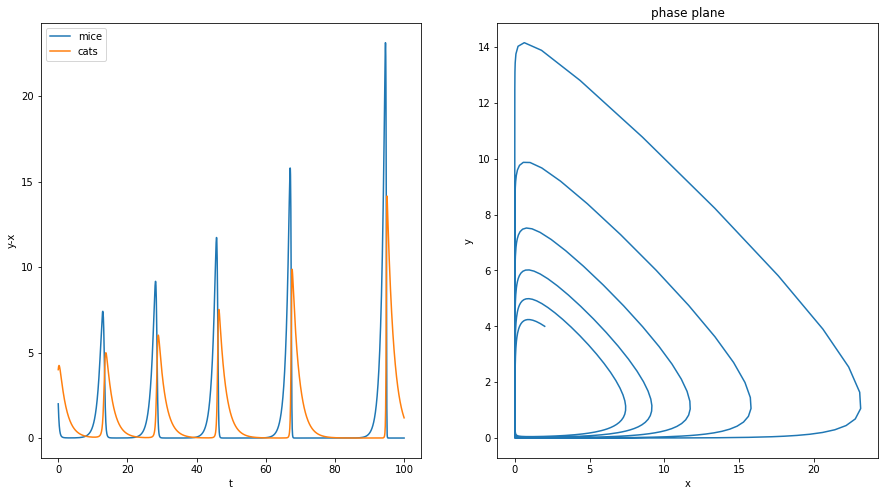

In [3]:
s0 = np.array([2, 4])
tmin = 0
tmax = 100

#LotaVoltera with k_x = 1, k_yx = 1, k_y = 0.5,k_xy = 0.5 
eul = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),s0,tmin,tmax,2000)
dynamics = eul.integrate()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
t = eul.getIntegrationTime()
ax1.plot(t,dynamics[:,0], label = 'mice')
ax1.plot(t,dynamics[:,1],label = 'cats')
ax1.set_ylabel('y-x')
ax1.set_xlabel('t')
ax1.legend()
ax2.plot(dynamics[:,0], dynamics[:,1])
ax2.set_title("phase plane")
ax2.set_ylabel("y")
ax2.set_xlabel('x')
plt.show()

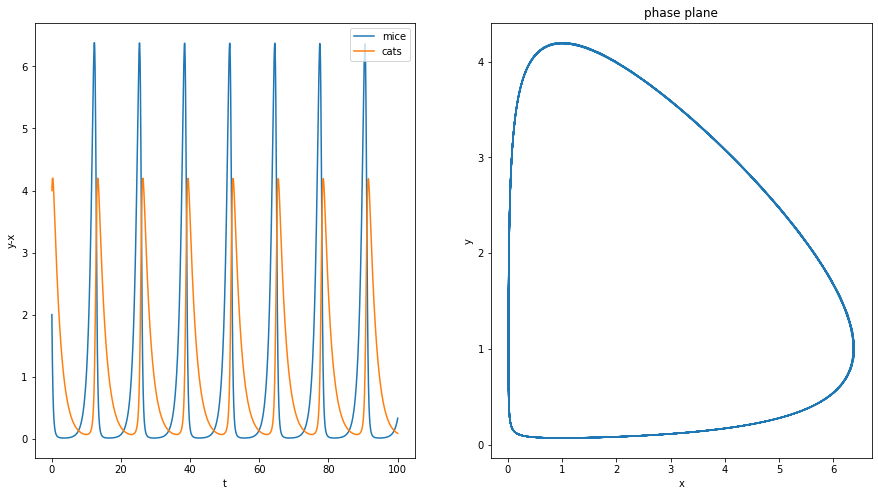

In [4]:
#Try with a different scheme
#LotaVoltera with k_x = 1, k_yx = 1, k_y = 0.5,k_xy = 0.5 
eul = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),s0,tmin,tmax,2000)
dynamics = eul.integrate()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
t = eul.getIntegrationTime()
ax1.plot(t,dynamics[:,0], label = 'mice')
ax1.plot(t,dynamics[:,1],label = 'cats')
ax1.set_ylabel('y-x')
ax1.set_xlabel('t')
ax1.legend()
ax2.plot(dynamics[:,0], dynamics[:,1])
ax2.set_title("phase plane")
ax2.set_ylabel("y")
ax2.set_xlabel('x')
plt.show()